In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('data_cleaned.csv')
X=data.drop('266',axis=1)
Y=data['266']

print(X.shape, Y.shape)

(377526, 237) (377526,)


In [3]:
X.head()

,4,8,13,14,15,16,17,18,19,21,...,256,257,258,259,260,261,262,263,264,265
0,80.0,51063.0,0.000134,0.000262,0.000439,0.046510,0.114171,0.153290,0.005142,66.0,...,0.0,0.005,1.487655,1.570576,0.773541,0.004160,0.971797,0.003283,1.097594,0.002344
1,80.0,51094.0,0.000001,0.000173,0.000259,0.042580,0.082782,0.151153,0.004833,66.0,...,0.0,0.006,1.487655,1.570649,0.773541,0.005127,0.971797,0.004223,1.097594,0.003263
2,80.0,51062.0,0.000001,0.000293,0.000517,0.046451,0.114882,0.149624,0.005026,66.0,...,0.0,0.005,1.487655,1.570568,0.773541,0.004144,0.971797,0.003254,1.097594,0.002305
3,80.0,51089.0,0.000015,0.000326,0.000524,0.046915,0.116692,0.148243,0.004917,66.0,...,0.0,0.005,1.487655,1.570552,0.773541,0.004109,0.971797,0.003189,1.097594,0.002220
4,80.0,51057.0,0.000077,0.000175,0.000349,0.042728,0.085012,0.149947,0.004664,66.0,...,0.0,0.005,1.487655,1.570552,0.773541,0.004110,0.971797,0.003191,1.097594,0.002222


In [4]:
ndim =20

In [5]:
Y.head()

0    b'WWW'
1    b'WWW'
2    b'WWW'
3    b'WWW'
4    b'WWW'
Name: 266, dtype: object

In [6]:
Y=pd.DataFrame(Y, columns=['266'])
Y.head()

,266
0,b'WWW'
1,b'WWW'
2,b'WWW'
3,b'WWW'
4,b'WWW'


In [7]:
print(Y.groupby('266').size())

266
b'ATTACK'           1793
b'DATABASE'         2648
b'FTP-CONTROL'      3054
b'FTP-DATA'         5797
b'FTP-PASV'         2688
b'GAMES'               8
b'INTERACTIVE'       110
b'MAIL'            28567
b'MULTIMEDIA'        576
b'P2P'              2094
b'SERVICES'         2099
b'WWW'            328092
dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
LE=LabelEncoder()
Y_Labeled=LE.fit_transform(Y)

print(type(Y_Labeled))

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'numpy.ndarray'>


In [10]:
Y_Labeleds = pd.DataFrame(Y_Labeled, columns=['266'])

In [11]:
print(Y_Labeleds.groupby('266').size())

266
0       1793
1       2648
2       3054
3       5797
4       2688
5          8
6        110
7      28567
8        576
9       2094
10      2099
11    328092
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
SC=StandardScaler()
X_train=SC.fit_transform(X)

In [14]:
pca=PCA(n_components=ndim)
X_train=pca.fit_transform(X_train)

print(X_train.shape)

(377526, 20)


In [15]:
print(X_train)

[[-4.35591765  4.09792475 -1.80026667 ...  0.2311453  -0.01612081
   0.05316844]
 [-4.3871175   4.00134951 -1.59391572 ...  0.19581019 -0.13186598
  -0.2217719 ]
 [-4.39701296  3.79191259 -1.77913445 ...  0.24830316 -0.11011255
  -0.05083698]
 ...
 [-2.6240649  -4.77218397  2.18186724 ... -0.83338161 -1.69134443
  -1.7671121 ]
 [-2.67507489 -4.73383288  2.11565548 ... -0.83741521 -1.54201179
  -1.50185597]
 [-2.64108468 -4.77978892  2.2025851  ... -0.83242638 -1.69469426
  -1.76737235]]


In [16]:
Y = Y_Labeleds.copy()

In [17]:
X = X_train.copy()

In [18]:
X.shape

(377526, 20)

In [19]:
Y.shape

(377526, 1)

In [20]:
import tensorflow as tf
import glob
from functools import partial
from keras.models import Sequential
from keras.layers import Flatten, Conv1D, MaxPooling1D, Dropout, Dense
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

Using TensorFlow backend.


In [21]:
import keras
config = tf.ConfigProto( device_count = {'GPU': 2 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [22]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1']

In [23]:
LABELS = ['ATTACK','DATABASE','FTP-CONTROL','FTP-DATA','FTP-PASV',
          'GAMES','INTERACTIVE','MAIL','MULTIMEDIA','P2P','SERVICES',
          'WWW']
counter = iter(range(20))

In [24]:
%%time
activation = 'relu'


num_classes = 12; #len(LABELS)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y_Labeleds,random_state=10)
# X_test,_,Y_test,_ = train_test_split(X_test,Y_test_Labeled, test_size = 0, random_state=0)

X_train_ann = X_train.copy()
X_test_ann = X_test.copy()

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Y_train_ann_cnn = to_categorical(Y_train, num_classes)
Y_test_ann_cnn = to_categorical(Y_test, num_classes)

print(X_train_ann.shape,X_test_ann.shape,Y_train_ann_cnn.shape,Y_test_ann_cnn.shape,X_train_cnn.shape,X_test_cnn.shape)

(264268, 20) (113258, 20) (264268, 12) (113258, 12) (264268, 20, 1) (113258, 20, 1)
CPU times: user 1.44 s, sys: 128 ms, total: 1.57 s
Wall time: 1.57 s


# ANN

In [25]:
%%time

model = Sequential()
model.add(Dense(21,input_dim = 20))
model.add(Dropout(0.5))
model.add(Dense(512, activation=activation))
model.add(Dropout(0.5))
model.add(Dense(1024, activation=activation))
model.add(Dropout(0.5))
model.add(Dense(1024, activation=activation))
model.add(Dropout(0.5))
model.add(Dense(1024, activation=activation))
model.add(Dropout(0.5))
model.add(Dense(756, activation=activation))
model.add(Dropout(0.5))
model.add(Dense(756, activation=activation))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

result = model.fit(X_train_ann, Y_train_ann_cnn, verbose=1, epochs=50, batch_size=5000,
                   validation_data=(X_test_ann, Y_test_ann_cnn))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 21)                441       
_________________________________________________________________
dropout_1 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               11264     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
__________

Epoch 43/50
264268/264268 [==============================] - 2s 7us/step - loss: 0.1363 - acc: 0.9650 - val_loss: 0.1047 - val_acc: 0.9686
Epoch 44/50
264268/264268 [==============================] - 2s 7us/step - loss: 0.1343 - acc: 0.9653 - val_loss: 0.1050 - val_acc: 0.9712
Epoch 45/50
264268/264268 [==============================] - 2s 7us/step - loss: 0.1350 - acc: 0.9652 - val_loss: 0.1041 - val_acc: 0.9691
Epoch 46/50
264268/264268 [==============================] - 2s 7us/step - loss: 0.1334 - acc: 0.9658 - val_loss: 0.1074 - val_acc: 0.9701
Epoch 47/50
264268/264268 [==============================] - 2s 7us/step - loss: 0.1332 - acc: 0.9658 - val_loss: 0.1052 - val_acc: 0.9693
Epoch 48/50
264268/264268 [==============================] - 2s 7us/step - loss: 0.1340 - acc: 0.9657 - val_loss: 0.1025 - val_acc: 0.9694
Epoch 49/50
264268/264268 [==============================] - 2s 7us/step - loss: 0.1325 - acc: 0.9661 - val_loss: 0.1012 - val_acc: 0.9705
Epoch 50/50
264268/264268 [

In [26]:
print("Length of Train Data:",len(X_train_cnn))
print("Length of Test Data:",len(X_test_cnn))

Length of Train Data: 264268
Length of Test Data: 113258


In [43]:
from sklearn.metrics import confusion_matrix
print("For Test Data: ")
Y_pred = model.predict(X_test_ann)
print("Confusion Matrix:")
matrix = confusion_matrix(Y_test_ann_cnn.argmax(axis=1), Y_pred.argmax(axis=1))
for i in range(len(matrix)):
    k = matrix[i,:]
    for j in k:
        print(j,end=" ")
    print("")

For Test Data: 
Confusion Matrix:
341 4 4 1 0 0 0 25 6 0 0 157 
0 718 8 0 0 0 0 7 2 2 0 57 
0 3 870 0 0 0 0 32 2 1 1 7 
14 0 0 1356 30 0 0 98 0 2 10 229 
0 13 2 11 565 0 0 13 0 0 14 189 
0 0 0 0 0 0 0 2 0 0 0 0 
0 0 9 0 0 0 0 17 0 0 0 7 
15 65 215 34 38 0 0 7400 16 41 8 738 
2 0 0 0 0 0 0 7 146 2 0 16 
2 4 8 4 0 0 0 34 73 95 0 408 
0 0 3 0 2 0 0 9 0 3 570 43 
2 6 69 11 132 0 0 305 79 9 47 97768 


In [45]:
for i in range(12):
    print( LABELS[i],": ",(matrix[i,i]/sum(matrix[i,:]))*100,"%")

ATTACK :  63.38289962825279 %
DATABASE :  90.42821158690177 %
FTP-CONTROL :  94.97816593886463 %
FTP-DATA :  77.97584818861415 %
FTP-PASV :  70.01239157372986 %
GAMES :  0.0 %
INTERACTIVE :  0.0 %
MAIL :  86.34772462077012 %
MULTIMEDIA :  84.39306358381504 %
P2P :  15.127388535031846 %
SERVICES :  90.47619047619048 %
WWW :  99.32945909700491 %


In [28]:
import seaborn as sn
import matplotlib.pyplot as plt

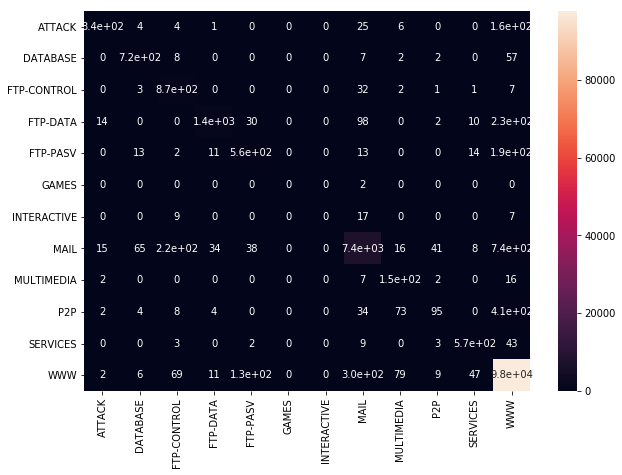

In [46]:
matrix = pd.DataFrame(matrix, index = LABELS,columns = LABELS)
plt.figure(figsize = (10,7))
sn.heatmap(matrix, annot=True)

In [51]:
print("For Train Data: ")

print("Confusion Matrix:")
Y_pred = model.predict(X_train_ann)

matrix = confusion_matrix(Y_train_ann_cnn.argmax(axis=1), Y_pred.argmax(axis=1))
for i in range(len(matrix)):
    k = matrix[i,:]
    for j in k:
        print(j,end=" ")
    print("")

For Train Data: 
Confusion Matrix:
787 4 6 1 1 0 0 63 12 4 2 375 
0 1659 18 0 0 0 0 33 1 2 0 141 
0 4 2005 1 0 0 0 89 10 3 1 25 
45 2 0 3193 74 0 0 207 0 1 21 515 
0 29 8 33 1334 0 0 24 0 0 38 415 
0 1 0 0 0 0 0 0 1 0 0 4 
0 0 37 0 0 0 0 24 0 0 0 16 
39 144 483 74 87 0 0 17428 34 89 12 1607 
1 0 0 0 0 0 0 13 347 5 0 37 
6 9 7 6 0 0 0 88 172 244 0 934 
0 1 0 0 2 0 0 17 1 5 1363 80 
5 19 162 17 293 0 0 669 156 23 87 228233 


In [52]:
for i in range(12):
    print( LABELS[i],": ",(matrix[i,i]/sum(matrix[i,:]))*100,"%")

ATTACK :  62.70916334661355 %
DATABASE :  89.48220064724919 %
FTP-CONTROL :  93.77923292797007 %
FTP-DATA :  78.68408082799408 %
FTP-PASV :  70.9197235513025 %
GAMES :  0.0 %
INTERACTIVE :  0.0 %
MAIL :  87.15307296094414 %
MULTIMEDIA :  86.10421836228288 %
P2P :  16.64392905866303 %
SERVICES :  92.78420694349899 %
WWW :  99.37691584227393 %


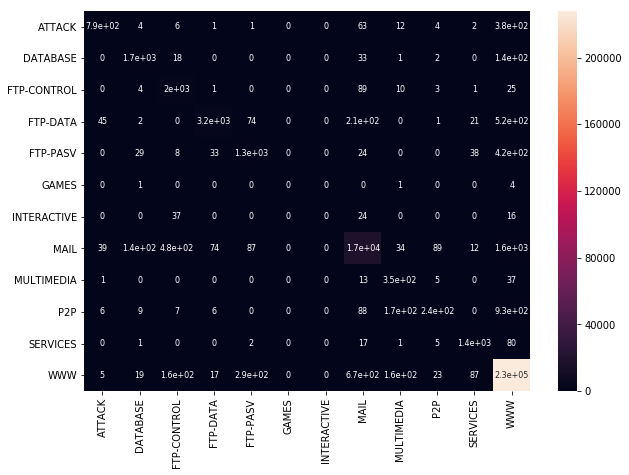

In [53]:
matrix = pd.DataFrame(matrix, index = LABELS,columns = LABELS)
plt.figure(figsize = (10,7))
sn.heatmap(matrix, annot=True,annot_kws={"size": 8})

In [54]:
from sklearn.metrics import classification_report
print("For Test Data: Full Classification Report ")
Y_test = np.argmax(Y_test_ann_cnn, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test_ann)
print(classification_report(Y_test, y_pred))

For Test Data: Full Classification Report 
             precision    recall  f1-score   support

          0       0.91      0.63      0.75       538
          1       0.88      0.90      0.89       794
          2       0.73      0.95      0.83       916
          3       0.96      0.78      0.86      1739
          4       0.74      0.70      0.72       807
          5       0.00      0.00      0.00         2
          6       0.00      0.00      0.00        33
          7       0.93      0.86      0.90      8570
          8       0.45      0.84      0.59       173
          9       0.61      0.15      0.24       628
         10       0.88      0.90      0.89       630
         11       0.98      0.99      0.99     98428

avg / total       0.97      0.97      0.97    113258



/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
print("For Train Data: Full Classification Report ")
Y_train = np.argmax(Y_train_ann_cnn, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_train_ann)
print(classification_report(Y_train, y_pred))

For Train Data: Full Classification Report 
             precision    recall  f1-score   support

          0       0.89      0.63      0.74      1255
          1       0.89      0.89      0.89      1854
          2       0.74      0.94      0.82      2138
          3       0.96      0.79      0.86      4058
          4       0.74      0.71      0.73      1881
          5       0.00      0.00      0.00         6
          6       0.00      0.00      0.00        77
          7       0.93      0.87      0.90     19997
          8       0.47      0.86      0.61       403
          9       0.65      0.17      0.26      1466
         10       0.89      0.93      0.91      1469
         11       0.98      0.99      0.99    229664

avg / total       0.97      0.97      0.97    264268



/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
%%time
y_pred = model.predict_classes(X_train_ann)

CPU times: user 20.8 s, sys: 2.91 s, total: 23.7 s
Wall time: 12.7 s


In [57]:
%%time
y_pred = model.predict_classes(X_test_ann)

CPU times: user 8.3 s, sys: 1.25 s, total: 9.55 s
Wall time: 5.02 s


# CNN

In [58]:
%%time

model = Sequential()
model.add(Conv1D(512, strides=2, input_shape=X_train_cnn.shape[1:], activation=activation, kernel_size=3, padding='same'))
model.add(MaxPooling1D())
model.add(Conv1D(256, strides=2, activation=activation, kernel_size=3, padding='same'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(13,input_dim = 12))
model.add(Dropout(0.5))
model.add(Dense(512, activation=activation))
model.add(Dropout(0.5))
# model.add(Dense(1024, activation=activation))
# model.add(Dropout(0.5))
# model.add(Dense(1024, activation=activation))
# model.add(Dropout(0.5))
# model.add(Dense(1024, activation=activation))
# model.add(Dropout(0.5))
# model.add(Dense(756, activation=activation))
# model.add(Dropout(0.5))
model.add(Dense(512, activation=activation))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

result = model.fit(X_train_cnn, Y_train_ann_cnn, verbose=1, epochs=50, batch_size=5000,
                   validation_data=(X_test_cnn, Y_test_ann_cnn))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 512)           2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 512)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 256)            393472    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 256)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 13)                3341      
_________________________________________________________________
dropout_8 (Dropout)          (None, 13)                0         
__________

In [59]:
print("Length of Train Data:",len(X_train_cnn))
print("Length of Test Data:",len(X_test_cnn))

Length of Train Data: 264268
Length of Test Data: 113258


In [60]:
from sklearn.metrics import confusion_matrix
print("For Test Data: ")
Y_pred = model.predict(X_test_cnn)
print("Confusion Matrix:")
matrix = confusion_matrix(Y_test_ann_cnn.argmax(axis=1), Y_pred.argmax(axis=1))
for i in range(len(matrix)):
    k = matrix[i,:]
    for j in k:
        print(j,end=" ")
    print("")

For Test Data: 
Confusion Matrix:
349 1 1 1 2 0 0 26 5 2 0 151 
0 761 3 0 2 0 0 8 0 0 0 20 
0 2 894 0 2 0 0 15 0 1 0 2 
2 0 0 1678 24 0 0 18 3 4 6 4 
0 0 3 16 769 0 0 9 0 0 0 10 
0 0 0 0 0 0 0 2 0 0 0 0 
0 0 6 0 0 0 0 7 0 3 0 17 
5 6 42 14 43 0 0 8399 5 16 2 38 
3 0 1 2 0 0 0 1 109 55 0 2 
1 2 4 7 1 0 0 30 5 440 2 136 
0 4 4 0 3 0 0 10 1 2 601 5 
3 60 7 34 165 0 0 238 10 453 81 97377 


In [61]:
for i in range(12):
    print( LABELS[i],": ",(matrix[i,i]/sum(matrix[i,:]))*100,"%")

ATTACK :  64.86988847583643 %
DATABASE :  95.84382871536525 %
FTP-CONTROL :  97.59825327510917 %
FTP-DATA :  96.49223691776884 %
FTP-PASV :  95.2912019826518 %
GAMES :  0.0 %
INTERACTIVE :  0.0 %
MAIL :  98.0046674445741 %
MULTIMEDIA :  63.005780346820806 %
P2P :  70.06369426751591 %
SERVICES :  95.3968253968254 %
WWW :  98.93221441053359 %


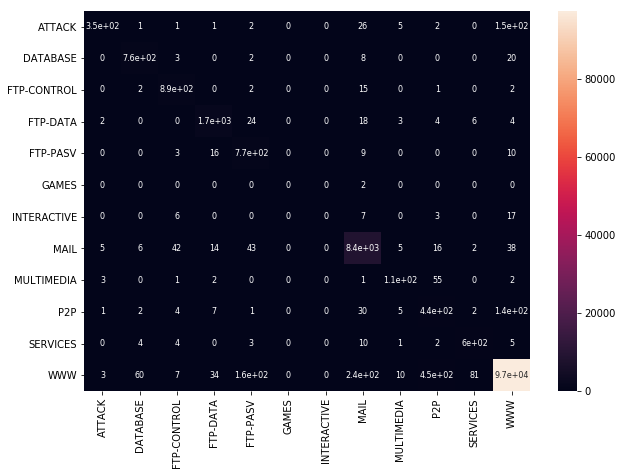

In [62]:
matrix = pd.DataFrame(matrix, index = LABELS,columns = LABELS)
plt.figure(figsize = (10,7))
sn.heatmap(matrix, annot=True,annot_kws={"size": 8})

In [63]:
print("For Train Data: ")

print("Confusion Matrix:")
Y_pred = model.predict(X_train_cnn)

matrix = confusion_matrix(Y_train_ann_cnn.argmax(axis=1), Y_pred.argmax(axis=1))
for i in range(len(matrix)):
    k = matrix[i,:]
    for j in k:
        print(j,end=" ")
    print("")

For Train Data: 
Confusion Matrix:
827 0 10 3 4 0 0 49 7 18 4 333 
0 1791 5 0 0 0 0 18 0 0 0 40 
0 1 2081 0 5 0 0 30 0 9 0 12 
1 0 1 3917 67 0 0 37 1 5 19 10 
0 0 2 35 1815 0 0 14 0 0 4 11 
0 1 0 0 0 0 0 0 0 1 0 4 
0 3 17 0 4 0 0 19 0 4 0 30 
20 18 61 24 80 0 0 19682 3 47 3 59 
1 0 2 3 1 0 0 1 276 115 0 4 
4 4 9 9 1 0 0 77 7 1023 2 330 
0 2 3 5 5 0 0 10 1 5 1425 13 
12 112 16 69 290 0 0 462 9 971 188 227535 


In [64]:
for i in range(12):
    print( LABELS[i],": ",(matrix[i,i]/sum(matrix[i,:]))*100,"%")

ATTACK :  65.89641434262948 %
DATABASE :  96.60194174757282 %
FTP-CONTROL :  97.33395696913003 %
FTP-DATA :  96.52538196155743 %
FTP-PASV :  96.49122807017544 %
GAMES :  0.0 %
INTERACTIVE :  0.0 %
MAIL :  98.42476371455719 %
MULTIMEDIA :  68.4863523573201 %
P2P :  69.78171896316508 %
SERVICES :  97.00476514635807 %
WWW :  99.07299359063676 %


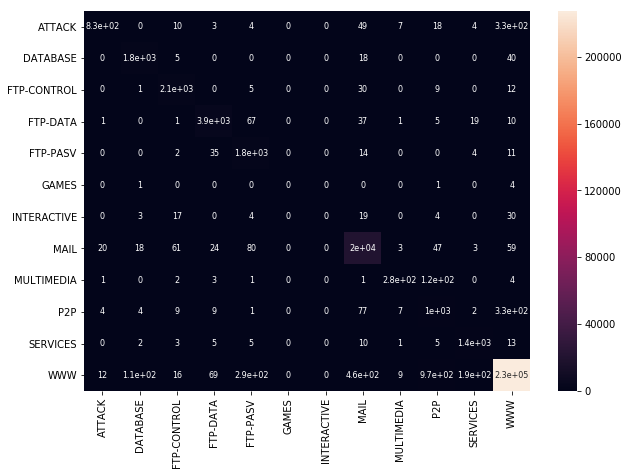

In [65]:
matrix = pd.DataFrame(matrix, index = LABELS,columns = LABELS)
plt.figure(figsize = (10,7))
sn.heatmap(matrix, annot=True,annot_kws={"size": 8})

In [66]:
from sklearn.metrics import classification_report
print("For Test Data: Full Classification Report ")
Y_test = np.argmax(Y_test_ann_cnn, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test_cnn)
print(classification_report(Y_test, y_pred))

For Test Data: Full Classification Report 
             precision    recall  f1-score   support

          0       0.96      0.65      0.77       538
          1       0.91      0.96      0.93       794
          2       0.93      0.98      0.95       916
          3       0.96      0.96      0.96      1739
          4       0.76      0.95      0.85       807
          5       0.00      0.00      0.00         2
          6       0.00      0.00      0.00        33
          7       0.96      0.98      0.97      8570
          8       0.79      0.63      0.70       173
          9       0.45      0.70      0.55       628
         10       0.87      0.95      0.91       630
         11       1.00      0.99      0.99     98428

avg / total       0.99      0.98      0.98    113258



/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
print("For Train Data: Full Classification Report ")
Y_train = np.argmax(Y_train_ann_cnn, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_train_cnn)
print(classification_report(Y_train, y_pred))

For Train Data: Full Classification Report 
             precision    recall  f1-score   support

          0       0.96      0.66      0.78      1255
          1       0.93      0.97      0.95      1854
          2       0.94      0.97      0.96      2138
          3       0.96      0.97      0.96      4058
          4       0.80      0.96      0.87      1881
          5       0.00      0.00      0.00         6
          6       0.00      0.00      0.00        77
          7       0.96      0.98      0.97     19997
          8       0.91      0.68      0.78       403
          9       0.47      0.70      0.56      1466
         10       0.87      0.97      0.92      1469
         11       1.00      0.99      0.99    229664

avg / total       0.99      0.99      0.99    264268



/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
print("For Train Data: No. of instances per class")
unique, counts = np.unique(Y_train, return_counts = True)
for u,c in zip(unique, counts):
    print(u,":",c)

For Train Data: No. of instances per class
0 : 1255
1 : 1854
2 : 2138
3 : 4058
4 : 1881
5 : 6
6 : 77
7 : 19997
8 : 403
9 : 1466
10 : 1469
11 : 229664


In [69]:
print("For Test Data: No. of instances per class")
unique, counts = np.unique(Y_test, return_counts = True)
for u,c in zip(unique, counts):
    print(u,":",c)

For Test Data: No. of instances per class
0 : 538
1 : 794
2 : 916
3 : 1739
4 : 807
5 : 2
6 : 33
7 : 8570
8 : 173
9 : 628
10 : 630
11 : 98428


In [70]:
%%time
y_pred = model.predict_classes(X_train_cnn)

CPU times: user 30.5 s, sys: 3.58 s, total: 34.1 s
Wall time: 19 s


In [71]:
%%time
y_pred = model.predict_classes(X_test_cnn)

CPU times: user 13.3 s, sys: 1.51 s, total: 14.8 s
Wall time: 8.27 s


# Decision Tree

In [24]:
from sklearn import tree
from sklearn.model_selection import cross_val_score


In [25]:
%%time
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X=X_train, y=Y_train)


CPU times: user 22.1 s, sys: 46.5 ms, total: 22.1 s
Wall time: 22.2 s


In [26]:
%%time
clf.feature_importances_ 
print('Accuracy: ',clf.score(X=X_test, y=Y_test)*100,'%') 
cross_val_score(clf, X_test, Y_test).mean()*100

Accuracy:  98.18644157587102 %


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


CPU times: user 15 s, sys: 34.3 ms, total: 15 s
Wall time: 15 s


In [29]:
%%time
clf.predict(X_train)

CPU times: user 88.5 ms, sys: 32.3 ms, total: 121 ms
Wall time: 119 ms


array([ 7,  7, 11, ..., 11, 11,  7])

# Random Forest

In [32]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier()
# Train the model on training data


In [33]:
%%time
rf.fit(X_train, Y_train);

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


CPU times: user 24.4 s, sys: 141 ms, total: 24.6 s
Wall time: 24.6 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
%%time
rf.predict(X_test)

CPU times: user 278 ms, sys: 3.77 ms, total: 282 ms
Wall time: 279 ms


array([11, 11, 11, ..., 11, 11, 11])

In [35]:
print('Accuracy: ',rf.score(X=X_test, y=Y_test)*100,'%') 
cross_val_score(rf, X_test, Y_test).mean()*100

Accuracy:  99.01463914248883 %


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column

98.51400772737149

# SVM

In [29]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [30]:
%%time
clf.fit(X_train, Y_train)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 1h 38min 21s, sys: 16.5 s, total: 1h 38min 38s
Wall time: 1h 38min 34s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
%%time
y_pred = clf.predict(X_test)

CPU times: user 2min 2s, sys: 84.4 ms, total: 2min 2s
Wall time: 2min 2s


In [32]:
print('Accuracy: ',clf.score(X=X_test, y=Y_test)*100,'%') 
cross_val_score(clf, X_test, Y_test).mean()*100

Accuracy:  96.18658284624486 %


NameError: name 'cross_val_score' is not defined

# Naive bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

In [26]:
%%time
model.fit(X_train, Y_train)

CPU times: user 121 ms, sys: 65 ms, total: 186 ms
Wall time: 184 ms


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [27]:
%%time
y_pred = model.predict(X_test)

CPU times: user 148 ms, sys: 220 ms, total: 368 ms
Wall time: 366 ms


In [28]:
print('Accuracy: ',model.score(X=X_test, y=Y_test)*100,'%') 
cross_val_score(model, X_test, Y_test).mean()*100

Accuracy:  77.77993607515585 %


NameError: name 'cross_val_score' is not defined